In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
import warnings
sns.set(rc={'figure.figsize':(15,6)})
pd.pandas.set_option("display.max_columns",None)

# Data Cleaning

In [200]:
data = pd.read_csv("/content/adult.csv")

In [201]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [202]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [203]:
data.shape

(32561, 15)

In [204]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [205]:
data.duplicated().sum()

24

In [206]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [207]:
categorical_columns = data.select_dtypes(include='object').nunique()

In [208]:
numrical_columns = data.select_dtypes(include='int').nunique()

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [210]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [211]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [212]:
categorical_column = data.select_dtypes(include='object').columns
for i in categorical_column:
  print(i,data[i].unique())
  print()
  print("********************************")
  print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

********************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

********************************

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

********************************

race ['White' 'Black' 'Asian-Pac-Islander' 

In [213]:
data['workclass'] = data['workclass'].replace(" ?","Private")
data['occupation'] = data['occupation'].replace(" ?","Pro-specialty")
data['native_country'] = data['native.country'].replace(" ?","United-States")

# Data Visualization

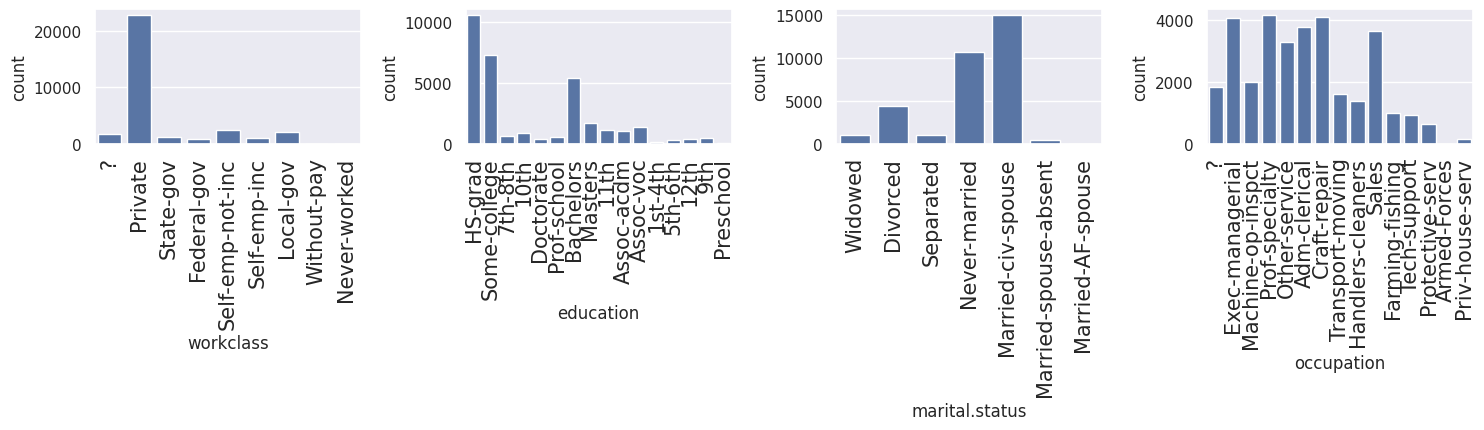

In [214]:
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(15,6)})

col1 = ['workclass','education','marital.status','occupation']

for i in range(0, len(col1)):
  plt.subplot(2,4,i+1)
  sns.countplot(x=data[col1[i]])
  plt.xticks(size=15,rotation=90)
  plt.tight_layout()


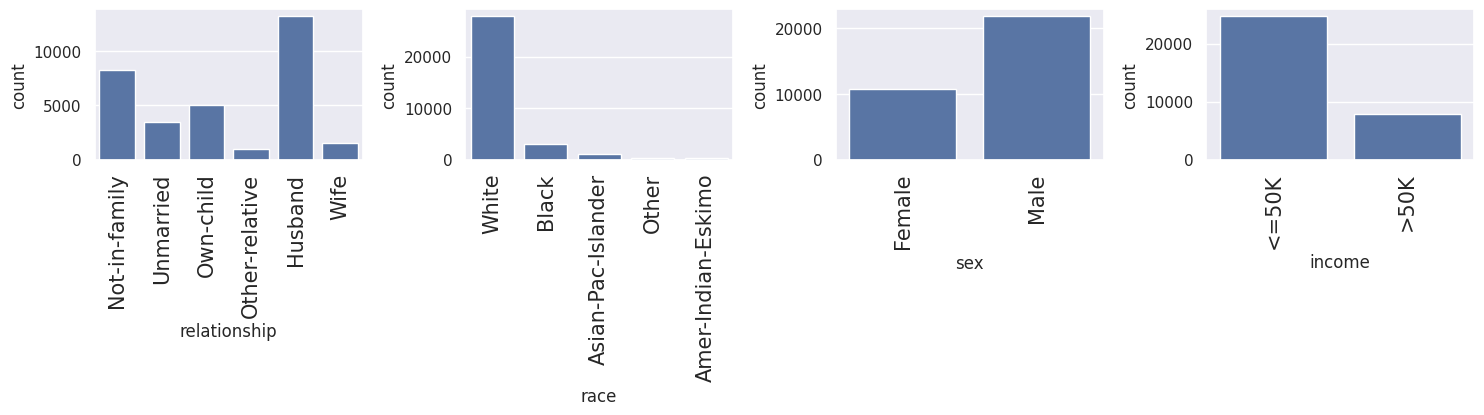

In [215]:
col2 = ['relationship','race','sex','income']
for i in range(0, len(col2)):
  plt.subplot(2,4,i+1)
  sns.countplot(x=data[col2[i]])
  plt.xticks(size=15,rotation=90)
  plt.tight_layout()

<ipython-input-216-6be18eefcc3f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_fetaures[i]])
<ipython-input-216-6be18eefcc3f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_fetaures[i]])
<ipython-input-216-6be18eefcc3f>:5: UserWarning: 

`distplot` is a dep

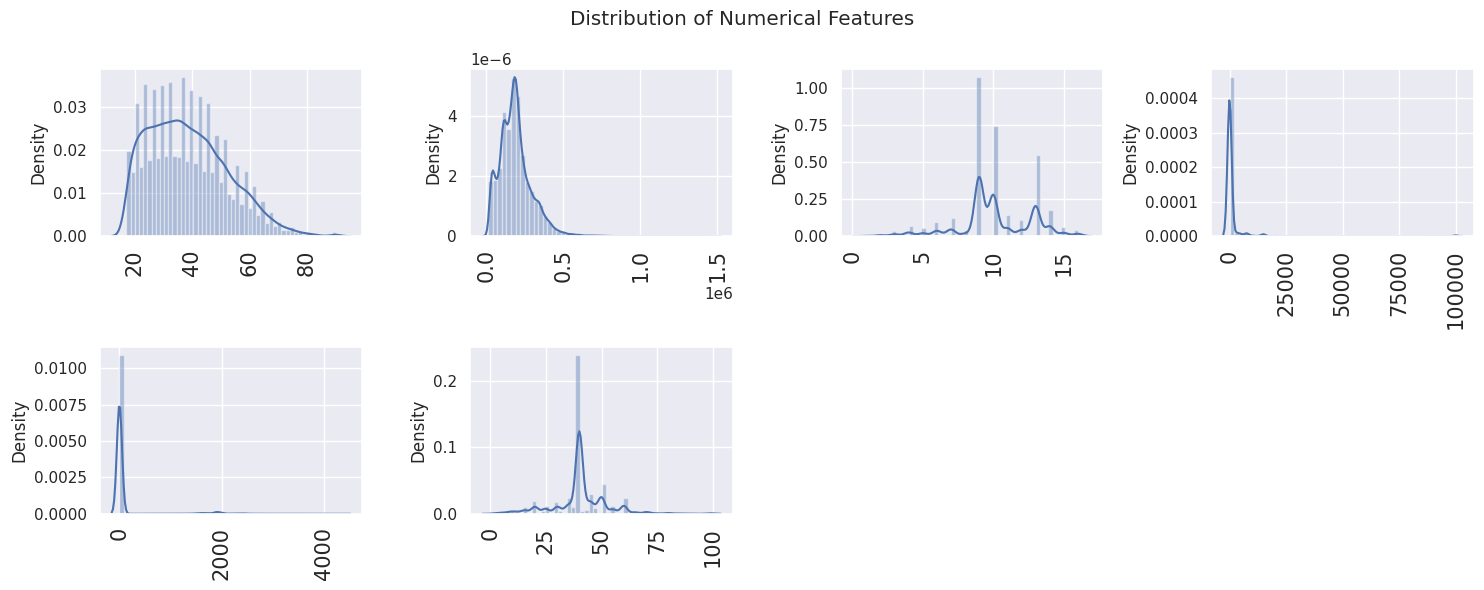

In [216]:
numerical_fetaures = data.select_dtypes(include='int').columns
plt.suptitle("Distribution of Numerical Features")
for i in range(0, len(numerical_fetaures)):
  plt.subplot(2,4,i+1)
  sns.distplot(x=data[numerical_fetaures[i]])
  plt.xticks(size=15,rotation=90)
  plt.tight_layout()

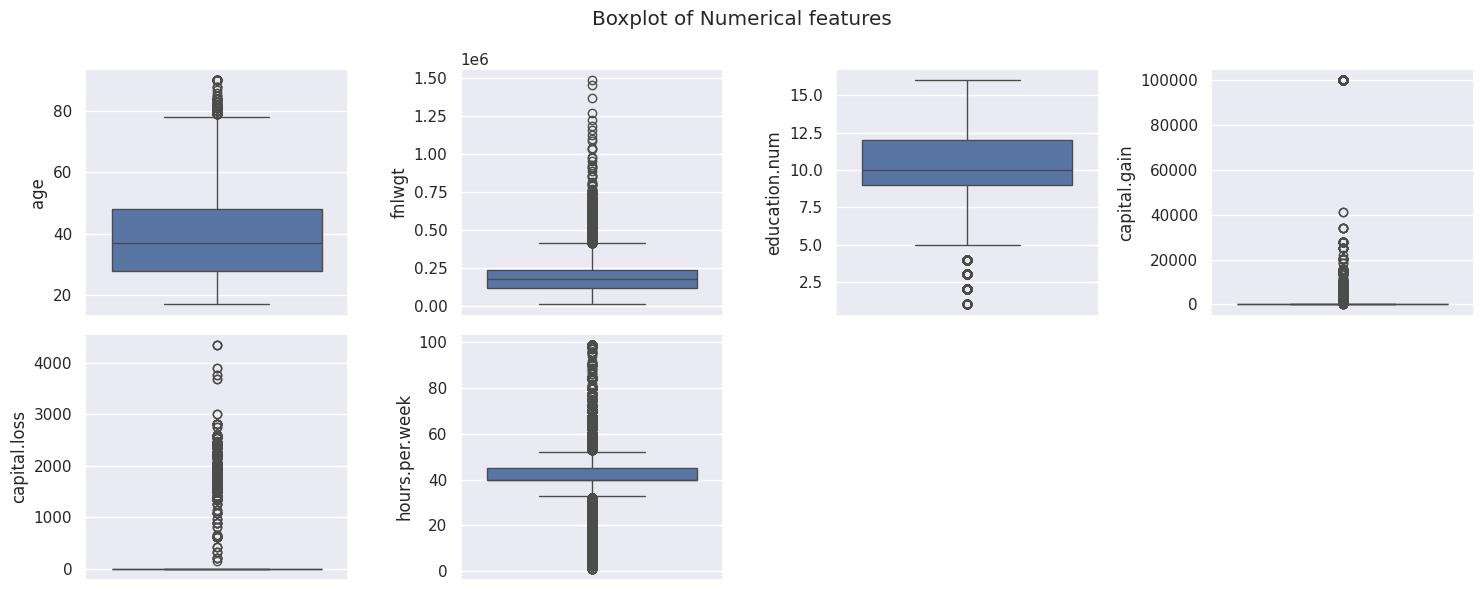

In [217]:
plt.suptitle("Boxplot of Numerical features")
for i in range(0,len(numerical_fetaures)):
  plt.subplot(2,4,i+1)
  sns.boxplot(data=data[numerical_fetaures[i]])
  plt.xticks(size=15,rotation=90)
  plt.tight_layout()

<Axes: xlabel='income'>

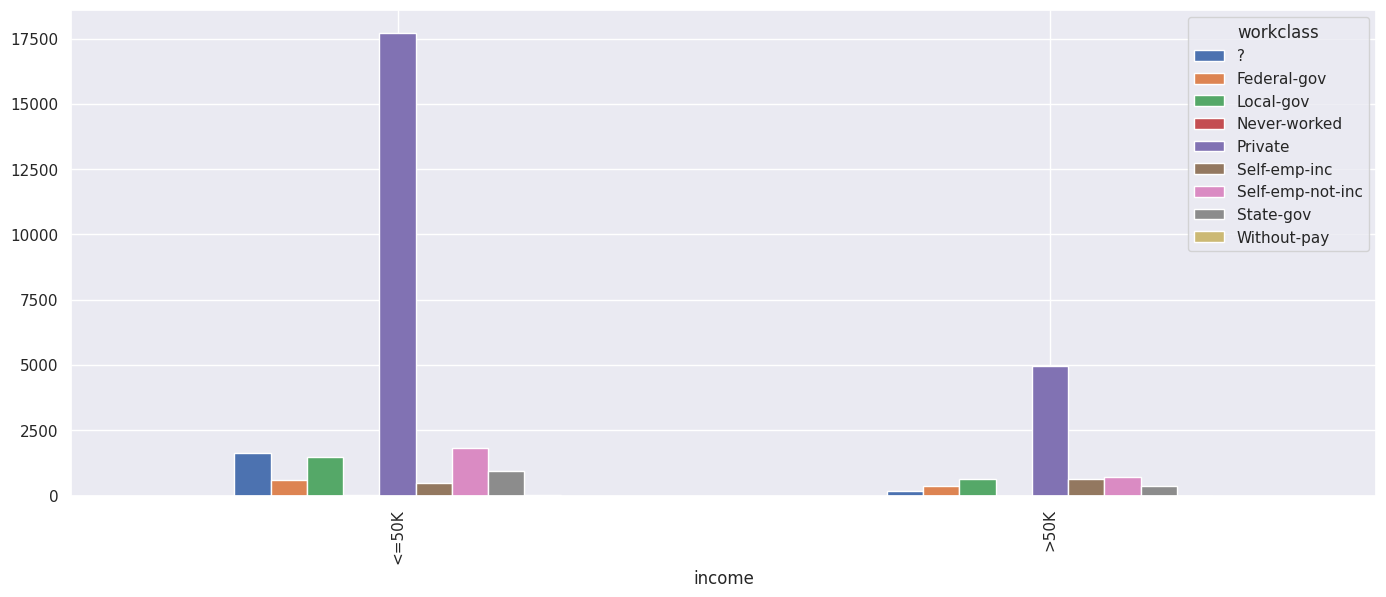

In [218]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

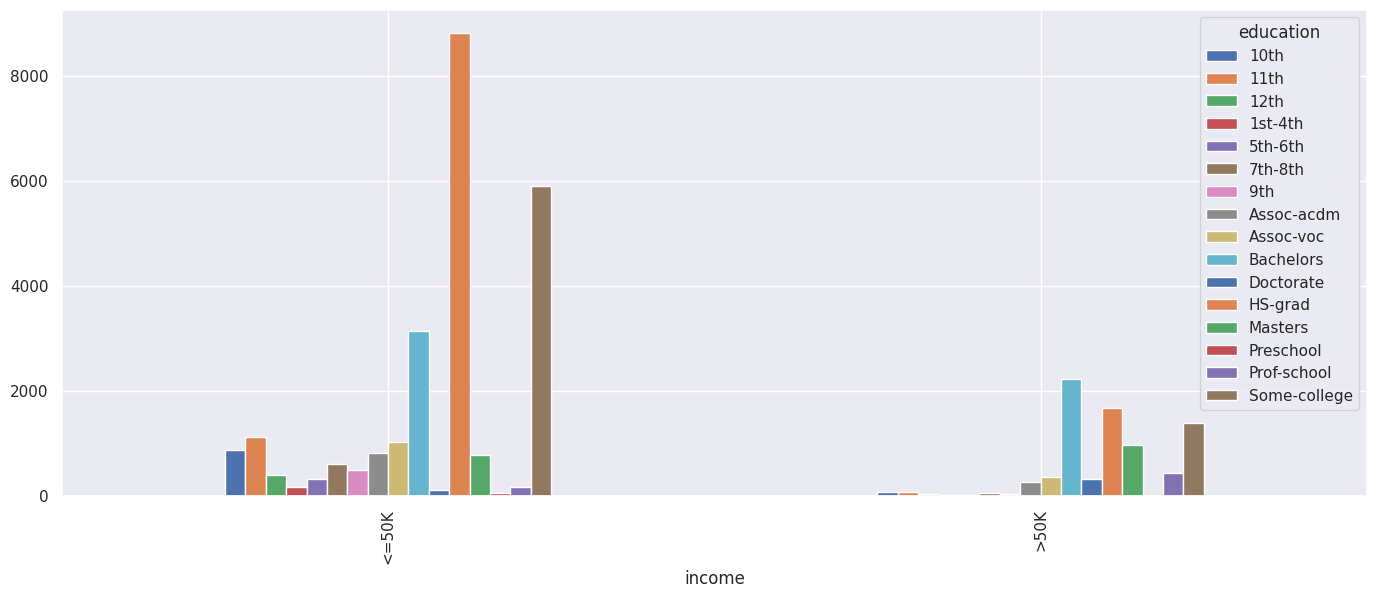

In [219]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

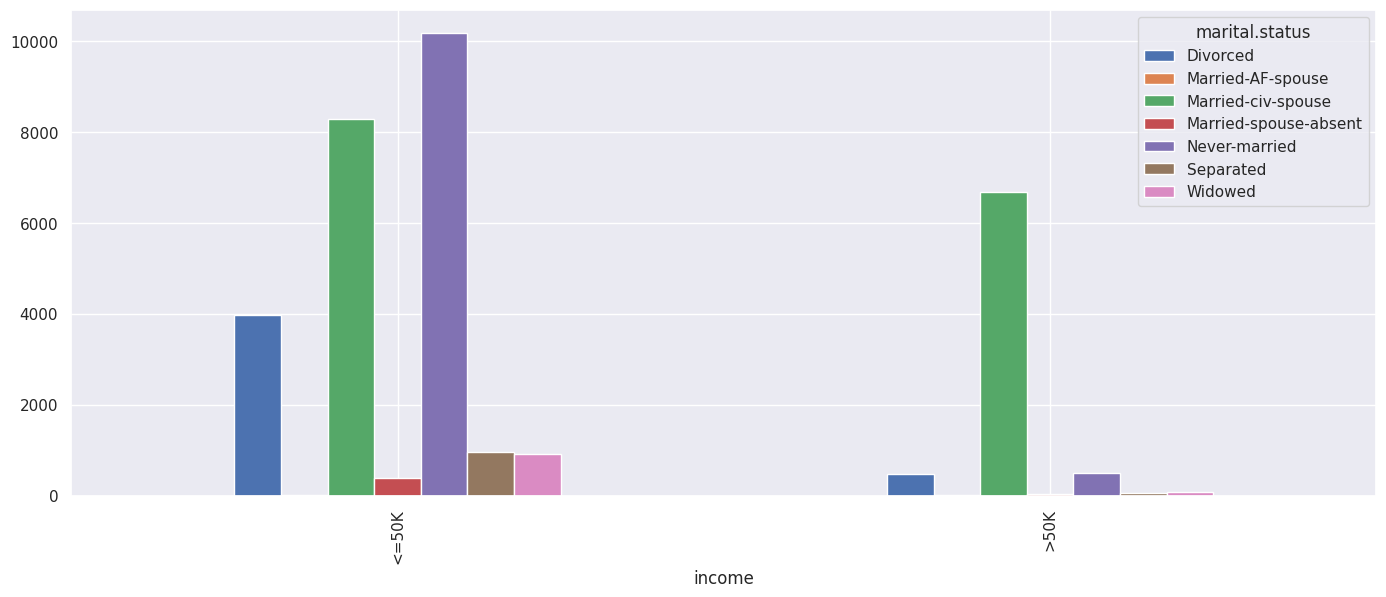

In [220]:
marital_status = pd.crosstab(data['income'],data['marital.status'])
marital_status.plot(kind='bar')

<Axes: xlabel='income'>

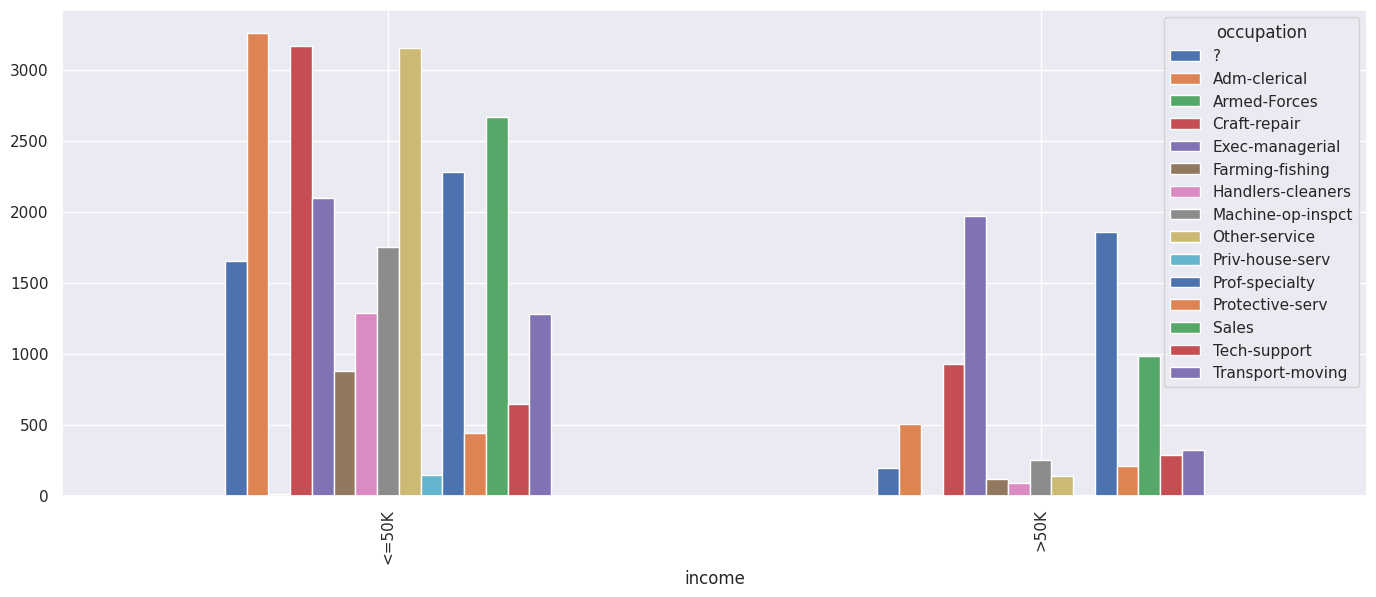

In [221]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind='bar')

<Axes: xlabel='income'>

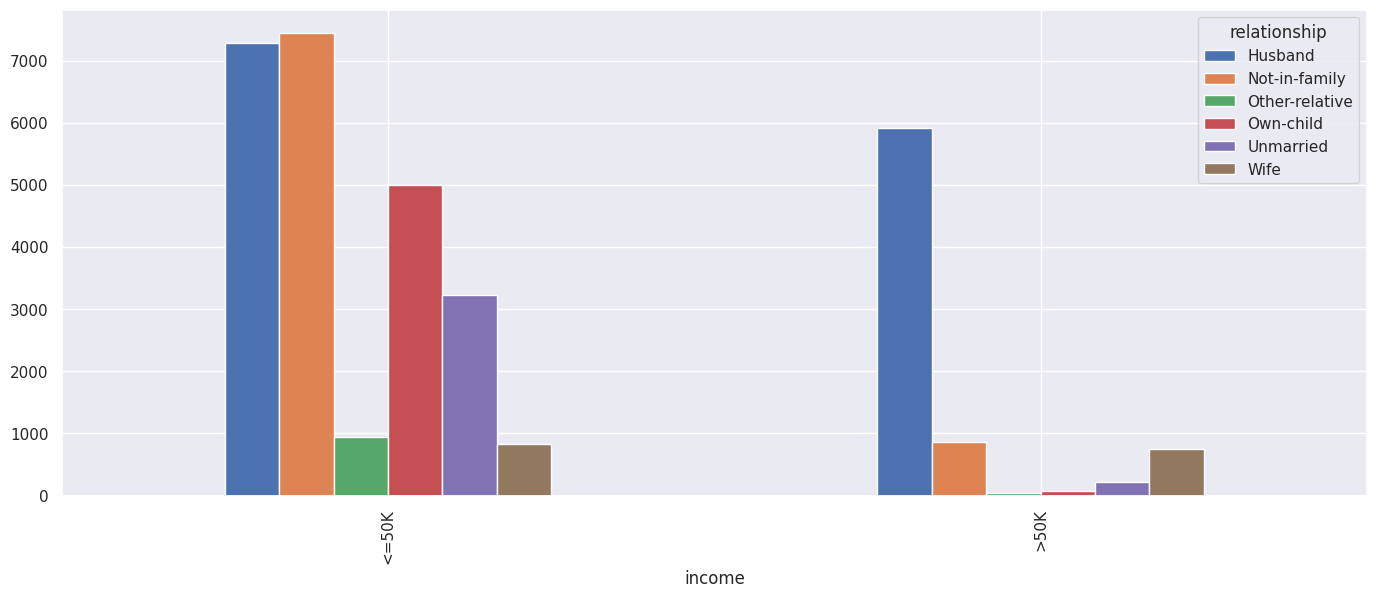

In [222]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind='bar')

<Axes: xlabel='income'>

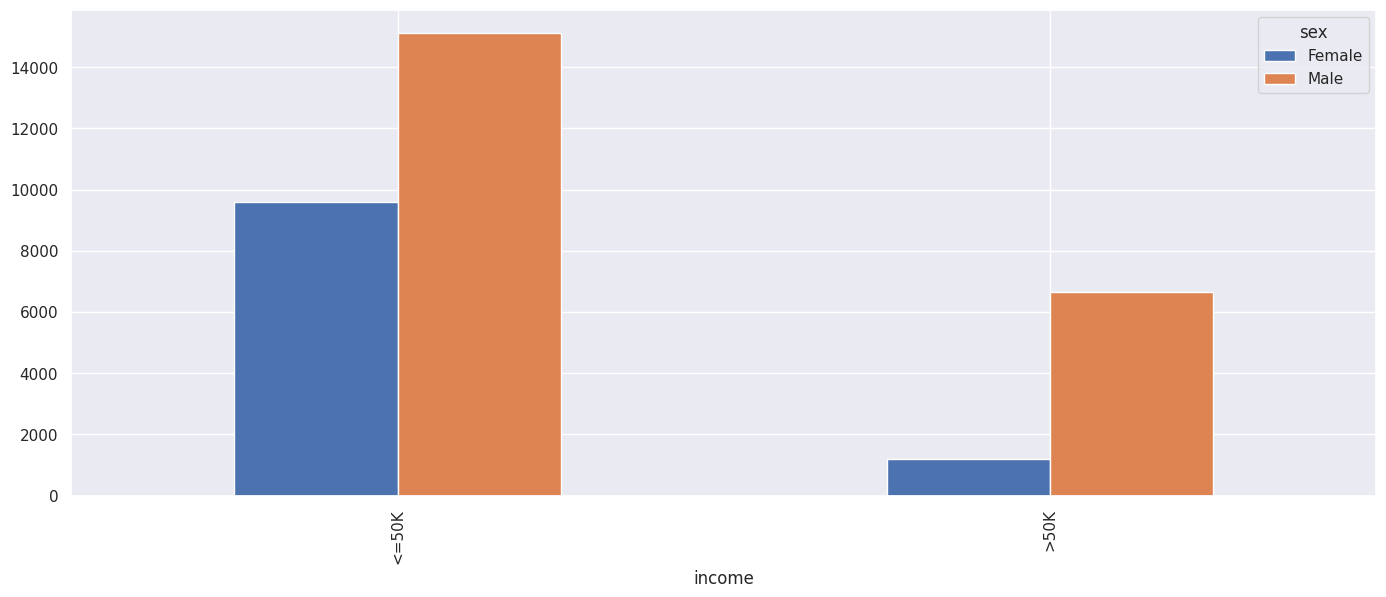

In [223]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind='bar')

# Data Transformation

In [224]:
categorical_column = data.select_dtypes(include='object').columns
numerical_fetaures = data.select_dtypes(include='int').columns
print(categorical_column)
print()
print(numerical_fetaures)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income',
       'native_country'],
      dtype='object')

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [225]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_feature = ['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# looping through all the categorical features to do label_encoding
for feature in categorical_feature:
  label_encoder.fit(data[feature])
  data[feature] = label_encoder.transform(data[feature])

In [226]:
data["income"] = data["income"].map({'<=50K':0, '>50K':1})

<ipython-input-227-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

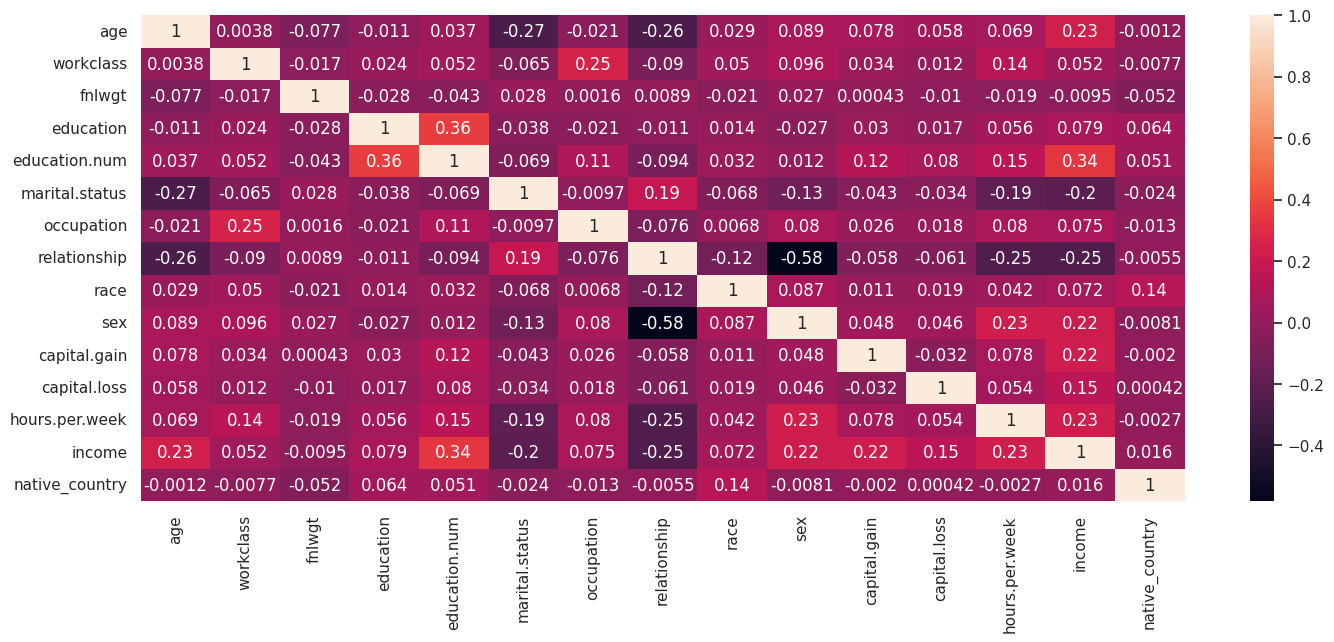

In [227]:
sns.heatmap(data.corr(),annot=True)

In [228]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,United-States,0,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,United-States,0,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,United-States,0,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,United-States,0,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,United-States,0,39


In [229]:
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [230]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'native_country'],
      dtype='object')

In [231]:
data.drop(['education','fnlwgt','native.country'],axis=1,inplace=True)

In [232]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,native_country
0,90,0,9,6,0,1,4,0,0,4356,40,0,39
1,82,4,9,6,4,1,4,0,0,4356,18,0,39
2,66,0,10,6,0,4,2,0,0,4356,40,0,39
3,54,4,4,0,7,4,4,0,0,3900,40,0,39
4,41,4,10,5,10,3,4,0,0,3900,40,0,39


In [233]:
data.shape

(32561, 13)

In [234]:
# Saving the data
data.to_csv('Salary_Classification.csv',index=False)

# Model Training

In [235]:
data.shape

(32561, 13)

In [236]:
# splitting input feature and output feature
x = data.drop("income",axis=1)
y = data['income']

In [237]:
categorical_featuress = x.select_dtypes(include='object').columns
numrical_fetauress = x.select_dtypes(include='int').columns
print(categorical_featuress)
print()
print(numrical_fetauress)

Index([], dtype='object')

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native_country'],
      dtype='object')


In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [239]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
      ('imputer',SimpleImputer(strategy='most_frequent')),
      ('scaler',StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    ("num_pipeline",num_pipeline,numrical_fetauress)
)

In [240]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [241]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 12)
(6513, 12)
(26048,)
(6513,)


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay


In [243]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")

    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")

    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")

    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")

    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")

    return confusionmetrix,precision,recall,f1score,accuracyscore

# Hyperparameter Tuning

In [244]:
logistic_regression = LogisticRegression()

In [245]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']

}

In [246]:
grid = GridSearchCV(estimator=logistic_regression,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [247]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [248]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [249]:
grid.score(X_train,y_train)

0.780213452088452

In [250]:
y_prad = grid.predict(X_test)

In [251]:
accuracy_score(y_test,y_prad)

0.7787501919238446

In [252]:
decisionTree_classifier = DecisionTreeClassifier()

In [253]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [254]:
grid_search = GridSearchCV(estimator=decisionTree_classifier,param_grid=param_grid,cv=5,scoring="accuracy")

In [255]:
grid_search.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [256]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [257]:
grid_search.score(X_train,y_train)

0.6556357493857494

In [258]:
y_prad = grid_search.predict(X_test)

In [259]:
accuracy_score(y_test,y_prad)

0.6531552280055274

In [260]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      4976
           1       0.40      0.90      0.55      1537

    accuracy                           0.65      6513
   macro avg       0.67      0.74      0.63      6513
weighted avg       0.82      0.65      0.68      6513



In [261]:
rf = RandomForestClassifier()

In [262]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [263]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [264]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [265]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 30}

In [266]:
grid_search.score(X_train,y_train)

0.8247850122850123

In [267]:
y_prad = grid_search.predict(X_test)

In [268]:
accuracy_score(y_test,y_prad)

0.8113004759711346

In [269]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      4976
           1       0.57      0.86      0.68      1537

    accuracy                           0.81      6513
   macro avg       0.76      0.83      0.77      6513
weighted avg       0.86      0.81      0.82      6513



In [270]:
# params = {
#                 "Random Forest":{
#                     "class_weight":["balanced"],
#                     'n_estimators': [20, 50, 30],
#                     'max_depth': [10, 8, 5],
#                     'min_samples_split': [2, 5, 10],
#                 },
#                 "Decision Tree":{
#                     "class_weight":["balanced"],
#                     "criterion":['gini',"entropy","log_loss"],
#                     "splitter":['best','random'],
#                     "max_depth":[3,4,5,6],
#                     "min_samples_split":[2,3,4,5],
#                     "min_samples_leaf":[1,2,3],
#                     "max_features":["auto","sqrt","log2"]
#                 },
#                 "Logastic":{
#                     "class_weight":["balanced"],
#                     'penalty': ['l1', 'l2'],
#                     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                     'solver': ['liblinear', 'saga']
#                 }
#             }